In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
data2000 = pd.read_csv('Data/final_tmdb_data_2000.csv.gz')

In [64]:
data2001 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz')

In [65]:
# concatenating df1 and df2 along rows
df = pd.concat([data2000, data2001], axis=0)
 
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.100,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.108,2057.0,PG


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2508 entries, 0 to 1292
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2508 non-null   object 
 1   adult                  2506 non-null   float64
 2   backdrop_path          1324 non-null   object 
 3   belongs_to_collection  198 non-null    object 
 4   budget                 2506 non-null   float64
 5   genres                 2506 non-null   object 
 6   homepage               173 non-null    object 
 7   id                     2506 non-null   float64
 8   original_language      2506 non-null   object 
 9   original_title         2506 non-null   object 
 10  overview               2454 non-null   object 
 11  popularity             2506 non-null   float64
 12  poster_path            2231 non-null   object 
 13  production_companies   2506 non-null   object 
 14  production_countries   2506 non-null   object 
 15  rele

In [67]:
df.duplicated().sum()

1

# How many movies had at least some valid financial information (values > 0 for budget OR revenue)?
Please exclude any movies with 0's for budget AND revenue from the remaining visualizations.

In [68]:
df.dropna(subset=['budget'], inplace=True)
df.dropna(subset=['revenue'], inplace=True)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2506 entries, 1 to 1292
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2506 non-null   object 
 1   adult                  2506 non-null   float64
 2   backdrop_path          1324 non-null   object 
 3   belongs_to_collection  198 non-null    object 
 4   budget                 2506 non-null   float64
 5   genres                 2506 non-null   object 
 6   homepage               173 non-null    object 
 7   id                     2506 non-null   float64
 8   original_language      2506 non-null   object 
 9   original_title         2506 non-null   object 
 10  overview               2454 non-null   object 
 11  popularity             2506 non-null   float64
 12  poster_path            2231 non-null   object 
 13  production_companies   2506 non-null   object 
 14  production_countries   2506 non-null   object 
 15  rele

There are 2506 movies with some sort of revenue or budget information

# How many movies are there in each of the certification categories (G/PG/PG-13/R)

In [70]:
df['certification'].value_counts()

R          453
PG-13      182
NR          67
PG          63
G           24
NC-17        6
Unrated      1
-            1
Name: certification, dtype: int64

# What is the average revenue per certification category?


In [71]:
df.groupby(['certification']).mean('revenue')

,adult,budget,id,popularity,revenue,runtime,video,vote_average,vote_count
certification,,,,,,,,,
-,0.0,0.000000e+00,172550.000000,0.600000,0.000000e+00,90.000000,0.000000,5.375000,8.000000
G,0.0,2.383333e+07,55619.583333,19.347583,7.218533e+07,80.291667,0.041667,6.086167,1458.875000
NC-17,0.5,0.000000e+00,238414.500000,0.962000,0.000000e+00,42.166667,0.000000,5.472167,3.166667
NR,0.0,1.598509e+06,253524.417910,4.048373,2.255066e+06,91.402985,0.000000,4.171821,130.940299
PG,0.0,2.498810e+07,45986.539683,22.215349,6.242073e+07,100.095238,0.000000,6.048984,1423.555556
PG-13,0.0,3.106131e+07,42214.774725,14.270126,7.144754e+07,104.884615,0.000000,5.859297,1285.236264
R,0.0,9.982350e+06,63325.050773,8.278757,1.678888e+07,100.470199,0.000000,5.341057,508.927152
Unrated,0.0,0.000000e+00,169801.000000,1.176000,0.000000e+00,88.000000,0.000000,5.750000,4.000000


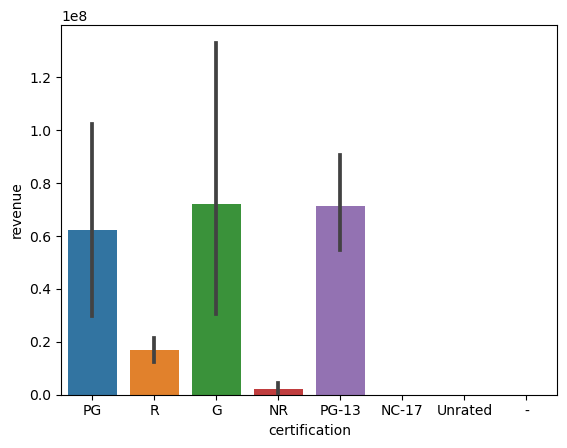

In [76]:
sns.barplot(data = df, y = 'revenue', x = 'certification');

# What is the average budget per certification category?

In [72]:
df.groupby(['certification']).mean('budget')

,adult,budget,id,popularity,revenue,runtime,video,vote_average,vote_count
certification,,,,,,,,,
-,0.0,0.000000e+00,172550.000000,0.600000,0.000000e+00,90.000000,0.000000,5.375000,8.000000
G,0.0,2.383333e+07,55619.583333,19.347583,7.218533e+07,80.291667,0.041667,6.086167,1458.875000
NC-17,0.5,0.000000e+00,238414.500000,0.962000,0.000000e+00,42.166667,0.000000,5.472167,3.166667
NR,0.0,1.598509e+06,253524.417910,4.048373,2.255066e+06,91.402985,0.000000,4.171821,130.940299
PG,0.0,2.498810e+07,45986.539683,22.215349,6.242073e+07,100.095238,0.000000,6.048984,1423.555556
PG-13,0.0,3.106131e+07,42214.774725,14.270126,7.144754e+07,104.884615,0.000000,5.859297,1285.236264
R,0.0,9.982350e+06,63325.050773,8.278757,1.678888e+07,100.470199,0.000000,5.341057,508.927152
Unrated,0.0,0.000000e+00,169801.000000,1.176000,0.000000e+00,88.000000,0.000000,5.750000,4.000000


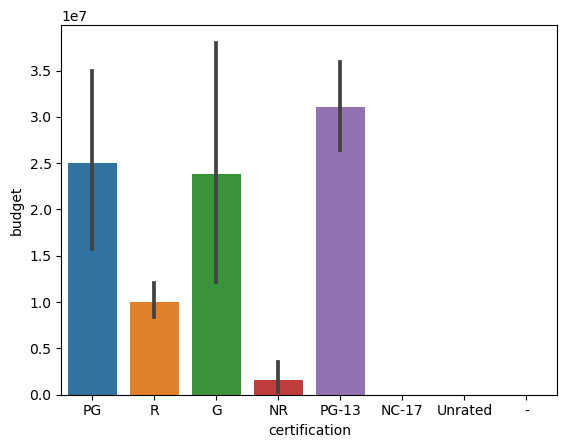

In [77]:
sns.barplot(data = df, y = 'budget', x = 'certification');

# Save as CSV

In [83]:
df.to_csv("Data/tmdb_results_combined.csv.gz",compression='gzip',index=False)